Imports, options, load marathon data


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the option to display all columns
pd.set_option('display.max_columns', None)
# Set the option to display more width (scroll to the right)
pd.set_option('display.width', 1000)

# import data file:
df_marathon = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx602-examples/refs/heads/main/data/2025_chicago_results.csv", index_col="BIB")

print('df_marathon.columns:', df_marathon.columns)



df_marathon.columns: Index(['name_(ctz)', 'short', 'gender', 'city,_state', 'bib', 'division', 'start_time', 'place_overall', 'place_gender', 'place_division', 'last_split', '05k', '10k', '15k', '20k', 'half', '25k', '30k', 'mile_20', 'mile_21', '35k', 'mile_22', 'mile_23', 'mile_24', '40k', 'mile_25', 'mile_25.2', 'finish', 'half_2', 'finish_tod', '05k_hours', '10k_hours', '15k_hours', '20k_hours', 'half_hours', '25k_hours', '30k_hours', 'mile_20_hours', 'mile_21_hours', '35k_hours', 'mile_22_hours', 'mile_23_hours', 'mile_24_hours', '40k_hours', 'mile_25_hours', 'mile_25.2_hours', 'finish_hours', 'half_2_hours', '05k_pace', '10k_pace', '15k_pace', '20k_pace', '25k_pace', '30k_pace', '35k_pace', '40k_pace', 'splits_mean', 'splits_std', 'start_place', 'finish_place', 'num_passed'], dtype='object')


Exploratory data analysis:
- explore some columns/values
- use groups of columns together

Text(0, 0.5, 'count')

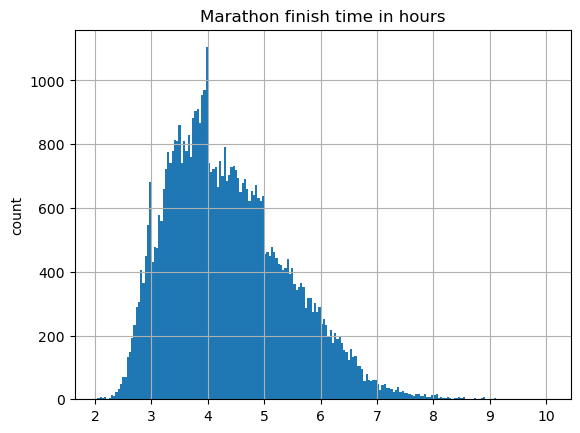

In [12]:
columns = ['name_(ctz)', 'gender', 'division', 'place_overall', 'finish']
time_columns = ['05k_hours', '10k_hours', '15k_hours', '20k_hours',
       'half_hours', '25k_hours', '30k_hours', 'mile_20_hours',
       'mile_21_hours', '35k_hours', 'mile_22_hours', 'mile_23_hours',
       'mile_24_hours', '40k_hours', 'mile_25_hours', 'mile_25.2_hours',
       'finish_hours', 'half_2_hours']
pace_columns = ['05k_pace', '10k_pace', '15k_pace',
       '20k_pace', '25k_pace', '30k_pace', '35k_pace', '40k_pace']

# print(df_marathon[columns].sample(10))
# print(df_marathon[time_columns].sample(10))
# print(df_marathon[pace_columns].sample(10))
# print(df_marathon['finish_hours'].describe())

df_marathon['finish_hours'].hist(bins=200)
plt.title("Marathon finish time in hours")
plt.ylabel("count")


Exploratory analysis: scatter plots

Add: coloring by category

Text(0.5, 0, '05k_pace in minutes')

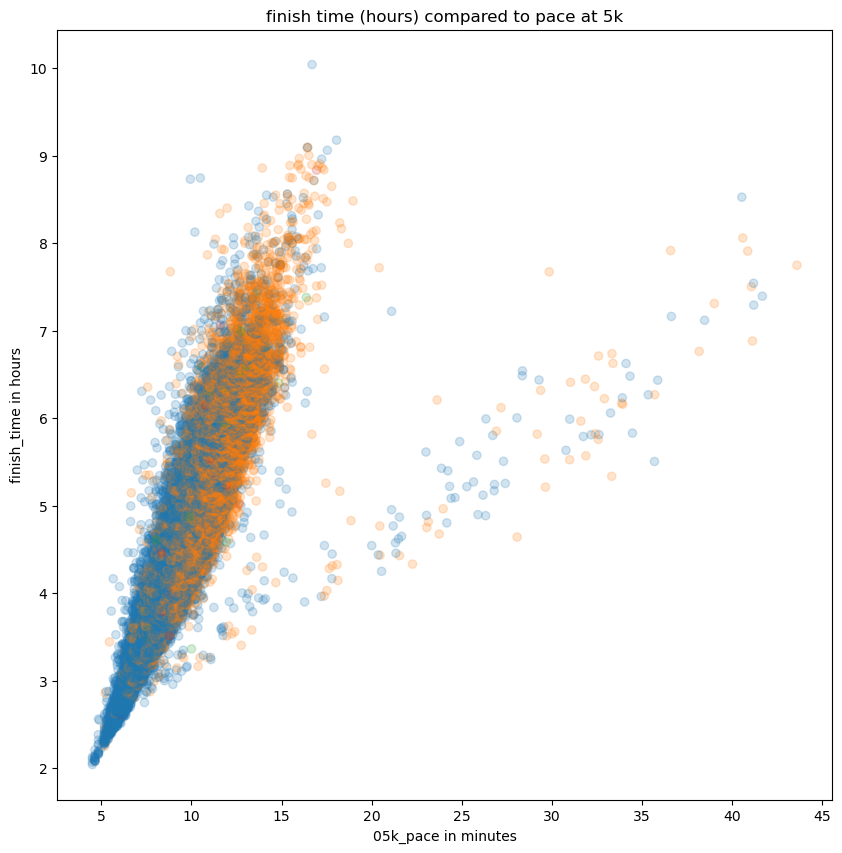

In [ ]:
## basic scatter plot without coloring
# print(df_marathon[pace_columns].sample(10))
# plt.scatter(df_marathon['05k_pace'], df_marathon['finish_hours'], alpha=0.1)
# plt.title("5k pace vs finish time (hours)")
# plt.xlabel('5k pace in minutes')
# plt.ylabel('finish time in hours')

## second example with category-based coloring:
# print(df_marathon['gender'].unique())
choices = df_marathon['gender'].unique()
colors = dict(zip(choices, 
            plt.rcParams['axes.prop_cycle'].by_key()['color'] ))
# print(colors)
# assign a "color" value to each category of data
df_marathon['color'] = df_marathon['gender'].map(colors)
# print(df_marathon[['gender','color']].sample(10))

# set the size of the output figure
plt.figure(figsize=(10,10))
# plt.scatter(df_marathon['05k_pace'], df_marathon['finish_hours'], 
#             alpha=0.1, color=df_marathon['color'])
plt.scatter(df_marathon['05k_pace'], df_marathon['finish_hours'], 
            alpha=0.2, color=df_marathon["color"])
plt.title('finish time (hours) compared to pace at 5k')
plt.ylabel('finish_time in hours')
plt.xlabel('05k_pace in minutes')


Correlation and heatmap

Text(0.5, 1.0, '5k pace correlation heatmap')

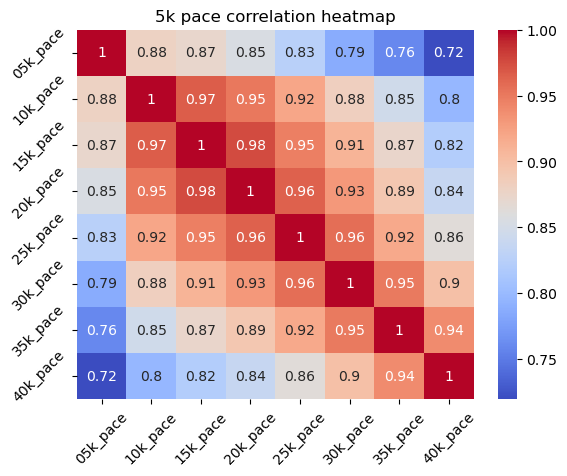

In [41]:
# df_marathon[pace_columns].mean().plot.bar()

# correlation matrix of paces:
# c = df_marathon[pace_columns].corr()
# print(c)
# plt.matshow(c)

import seaborn
ax = seaborn.heatmap(c, annot=True, cmap="coolwarm")
ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='y', labelrotation=45)
plt.title("5k pace correlation heatmap")


Grouping data by gender

<AxesSubplot:xlabel='gender'>

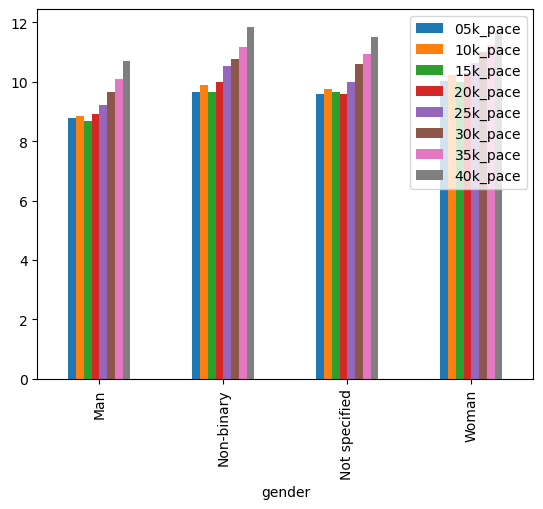

In [ ]:
# example 1: group by column 'gender'
grouped = df_marathon.groupby('gender')
# print(grouped['finish_hours'].describe())
# grouped['finish_hours'].mean().plot(kind='bar')
# plt.title('finish time by category')
# plt.ylabel('finish time in hours')

# histogram by group
# grouped['finish_hours'].hist(bins=200)
# each 5k pace by group
# grouped[pace_columns].mean().plot(kind='bar')


Grouping data by gender, division

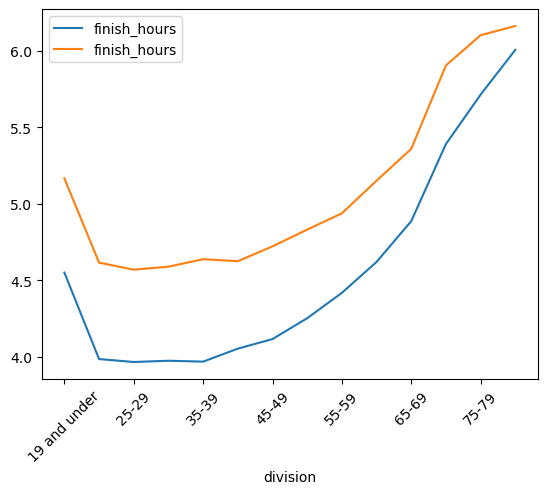

In [56]:
# box plot by categories
# df_marathon.boxplot(column=['finish_hours'],
#                     by=['gender', 'division'],
#                     rot=90)
# plt.title("finish time distribution by gender/division")

grouped = df_marathon.groupby(['gender', 'division'])
# print(grouped['finish_hours'].describe())
ax = grouped['finish_hours'].mean().loc['Man'].plot(legend=True)
ax = grouped['finish_hours'].mean().loc['Woman'].plot(legend=True)
ax.tick_params(axis='x', labelrotation=45)

